# Imports And Variables

In [19]:
import json
import re
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [20]:
# Phone number pattern
phone_numbers_regex = re.compile(r'((((\+)?995))(((\s)|[-.])*))?((((51)|(55)|(56)|(57)|(59))[0-9])|((32|032)(((\s)|[-.])*)2))((((\s)|[-.])*)[0-9])((((\s)|[-.])*)[0-9])((((\s)|[-.])*)[0-9])((((\s)|[-.])*)[0-9])((((\s)|[-.])*)[0-9])((((\s)|[-.])*)[0-9])')
# ID number pattern
id_regex = re.compile(r'(?<![\d+\-*/.,])(?<!\d)\d{11}(?![\d+\-*/.,])')
# Keys of the data
keys = ['input', 'input_en', 'output', 'output_ge', 'summary']
# Reads the data as pandas dataframe
with open('data.json', 'r', encoding='utf-8') as f:
    data = pd.read_json(f)

# Statistic Functions

In [21]:
def stat_create(pat: re, keys: list, name: str):
  """ Calculates occurences of specific pattern in data's keys values """
  for key in keys:
    data[key+"_"+name] = data[key].str.count(pat)


In [22]:
def print_stat(label:str, name: str, keys: list):
    print(label)
    for key in keys:
        print(f"{key}: {data[key+'_'+name].sum()}")

In [23]:
def stat_dict(keys:list, name:str)-> dict:
    ans = {}
    for key in keys:
        ans[key] = data[key+'_'+name].sum()
    return ans

# Masking Function

In [24]:
def masking(pat: re, keys: list, replacment: str):
  """ Masking every occurences of specific pattern """
  for key in keys:
    data[key] = data[key].str.replace(pat, replacment)


# Stats of Phone Numbers and IDs

In [25]:
phone_stat = stat_create(phone_numbers_regex, keys, "phone_nums_count")
id_stat = stat_create(id_regex, keys, "ids_count")

In [26]:
print_stat("Phone Numbers:", "phone_nums_count", keys)
print()
print_stat("IDs:", "ids_count", keys)

Phone Numbers:
input: 78
input_en: 78
output: 325
output_ge: 325
summary: 505

IDs:
input: 12
input_en: 12
output: 141
output_ge: 141
summary: 23


# Masking Phone Numbers and IDs

In [27]:
masking(phone_numbers_regex, keys, "____PHONE_NUMBER____")
masking(id_regex, keys, "____ID_NUMBER____")

In [28]:
with open('masked_data.csv', 'w') as f:
    f.write(data.to_csv())

# Plotting

Phone numbers pie chart

{'input': 78, 'input_en': 78, 'output': 325, 'output_ge': 325, 'summary': 505}


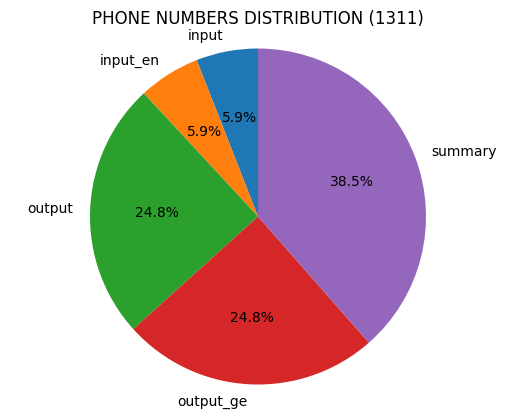

In [29]:
# Phone numbers plot
phoneDict = stat_dict(keys=keys, name="phone_nums_count")
print(phoneDict)
valuesPhone = list(phoneDict.values())
dictTitle = f"PHONE NUMBERS DISTRIBUTION ({sum(phoneDict.values())})"
labels = list(phoneDict.keys())
plt.pie(valuesPhone, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(dictTitle)
plt.show()

IDs pie chart

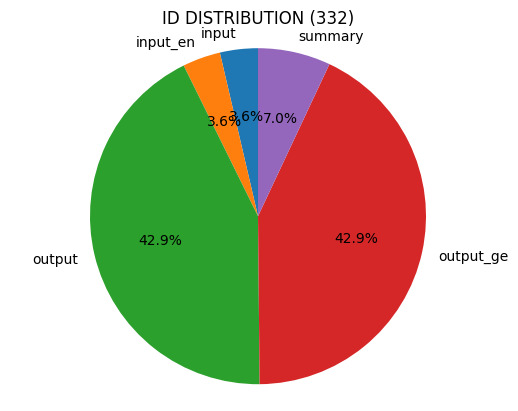

In [30]:
# ID plot
idDict = stat_dict(keys=keys, name="ids_count")
valuesID = list(idDict.values())
dictTitle = "ID DISTRIBUTION (332)"
labels = list(idDict.keys())
plt.pie(valuesID, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(dictTitle)
plt.show()